# Exploratory Data Analysis (EDA)

DATASET OVERVIEW
------------------------------------------------------------
Shape of dataset: (7043, 21)
Number of rows: 7043
Number of columns: 21

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
------------------------------------------------------------

FIRST 5 ROWS OF DATASET:
------------------------------------------------------------
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      N

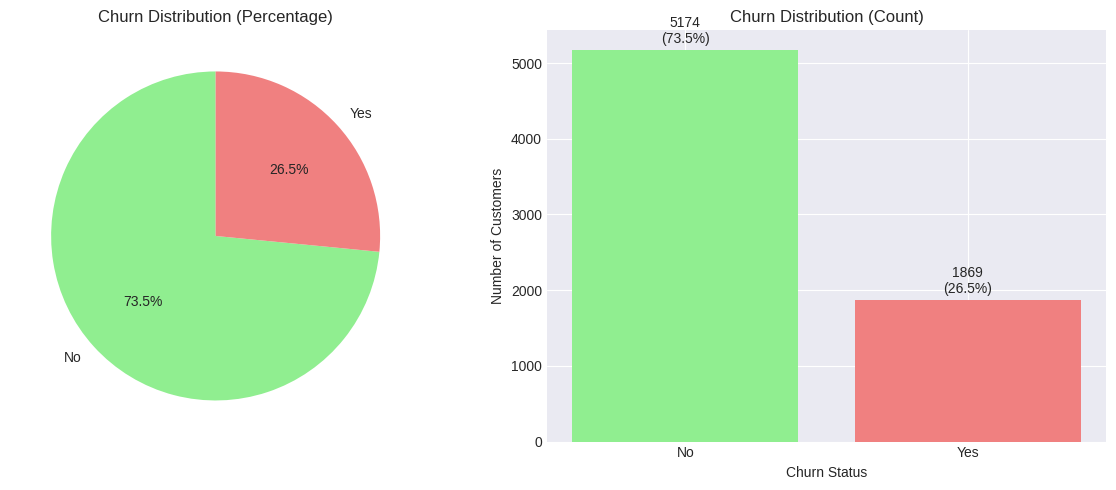

------------------------------------------------------------
DEMOGRAPHIC ANALYSIS:
------------------------------------------------------------


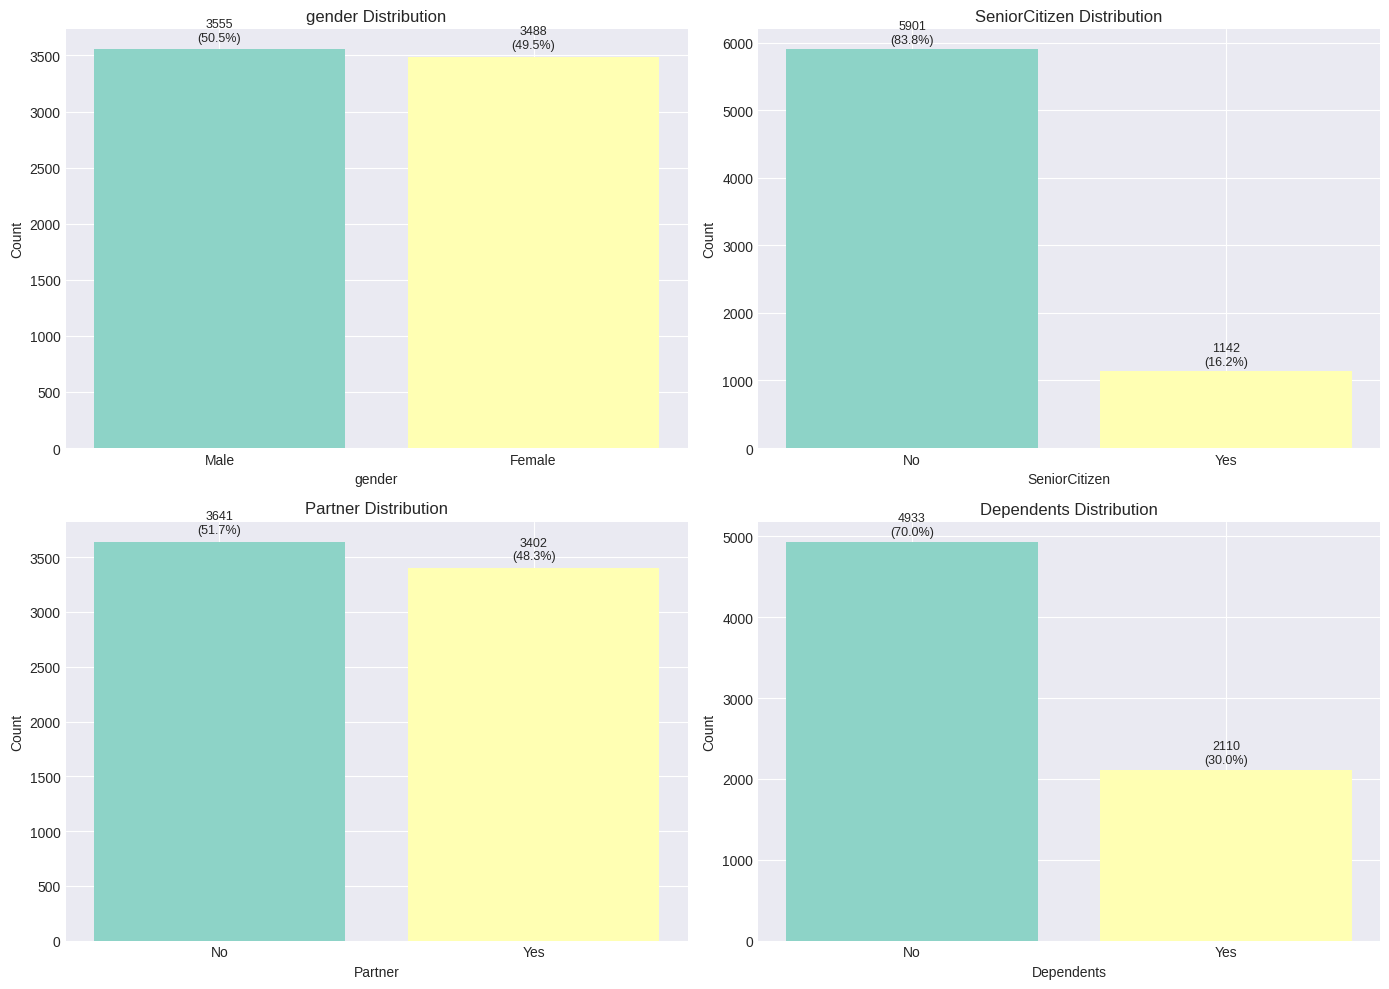

------------------------------------------------------------
CHURN RATE BY DEMOGRAPHIC FACTORS:
------------------------------------------------------------


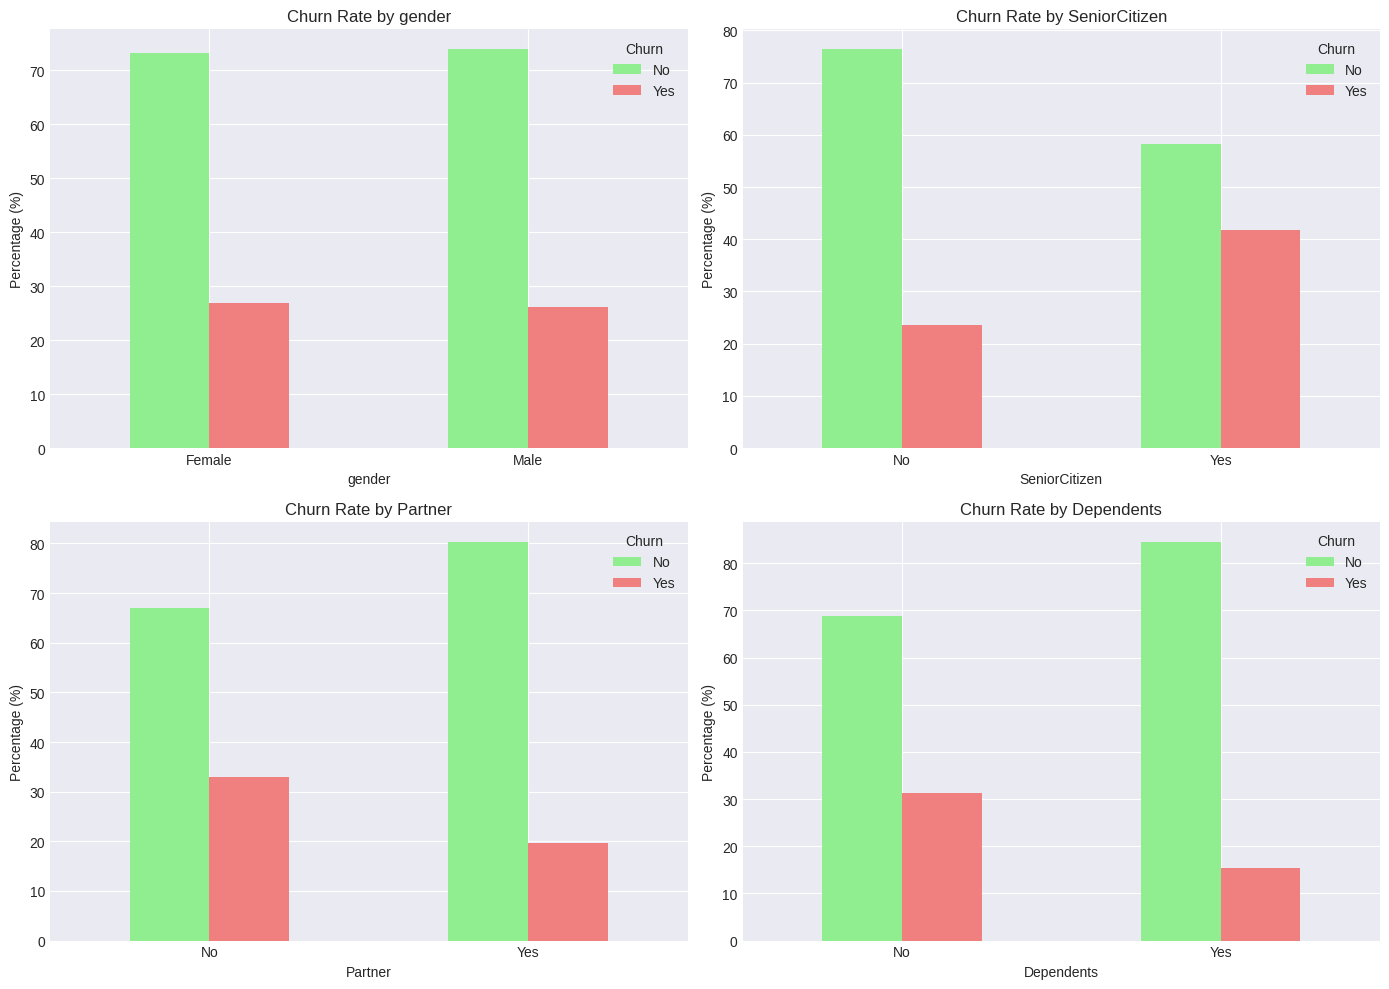

------------------------------------------------------------
SERVICE ANALYSIS:
------------------------------------------------------------


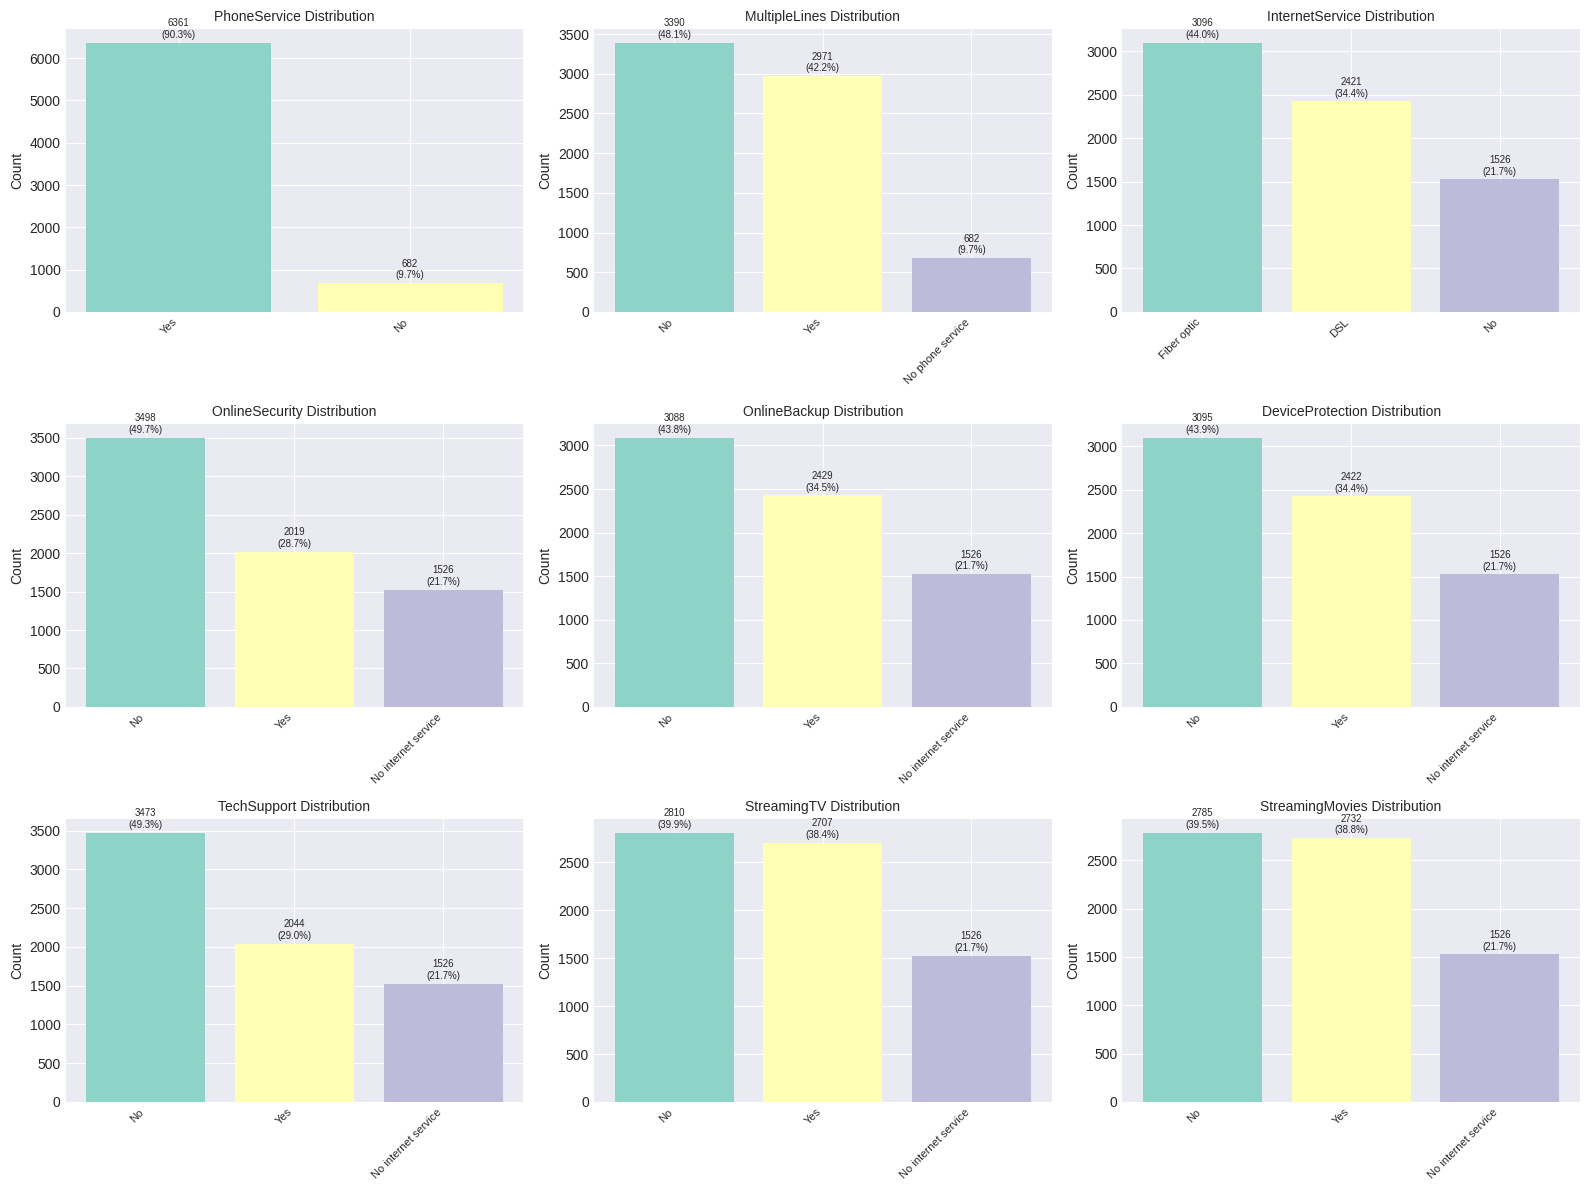

------------------------------------------------------------
CONTRACT AND BILLING ANALYSIS:
------------------------------------------------------------


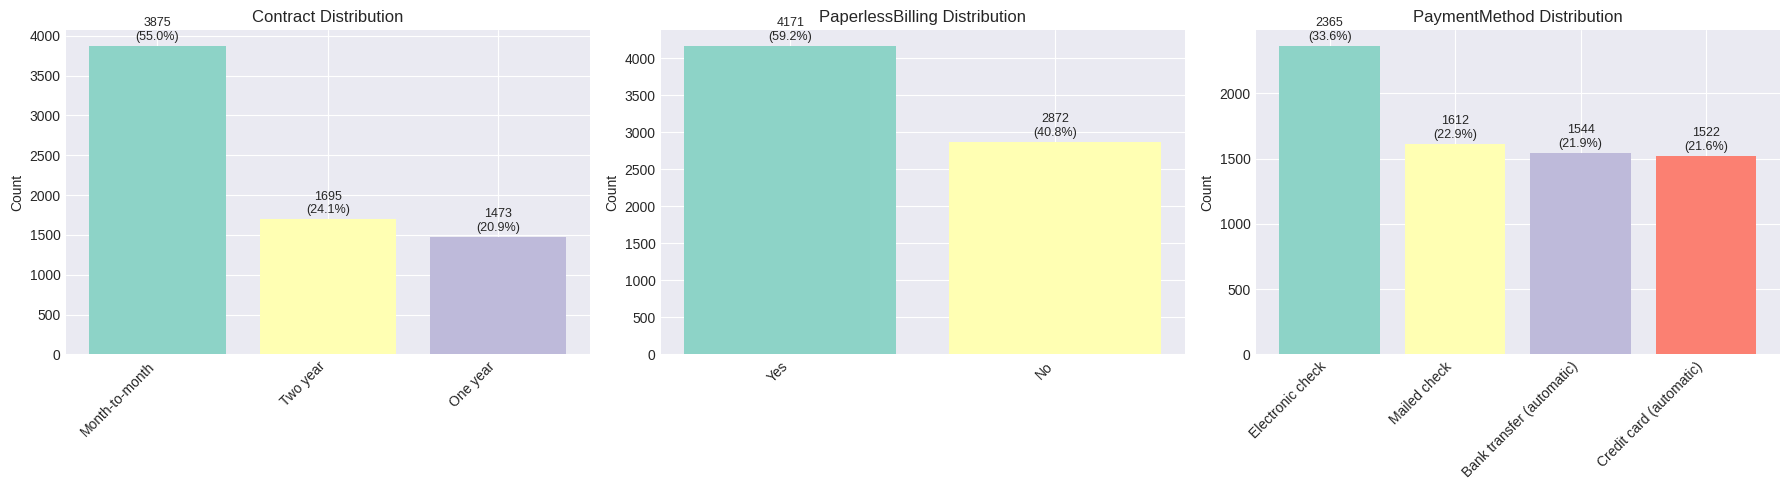

------------------------------------------------------------
CHURN RATE BY CONTRACT TYPE AND PAYMENT METHOD:
------------------------------------------------------------


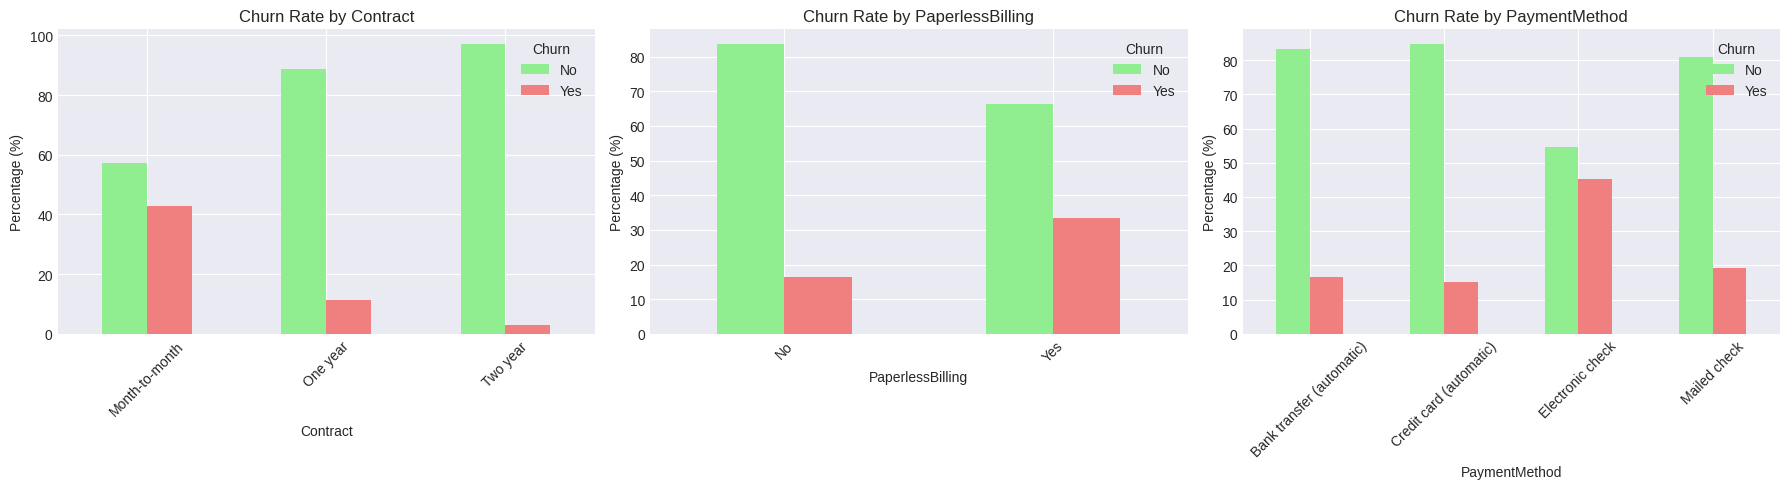

------------------------------------------------------------
NUMERICAL FEATURES ANALYSIS:
------------------------------------------------------------
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


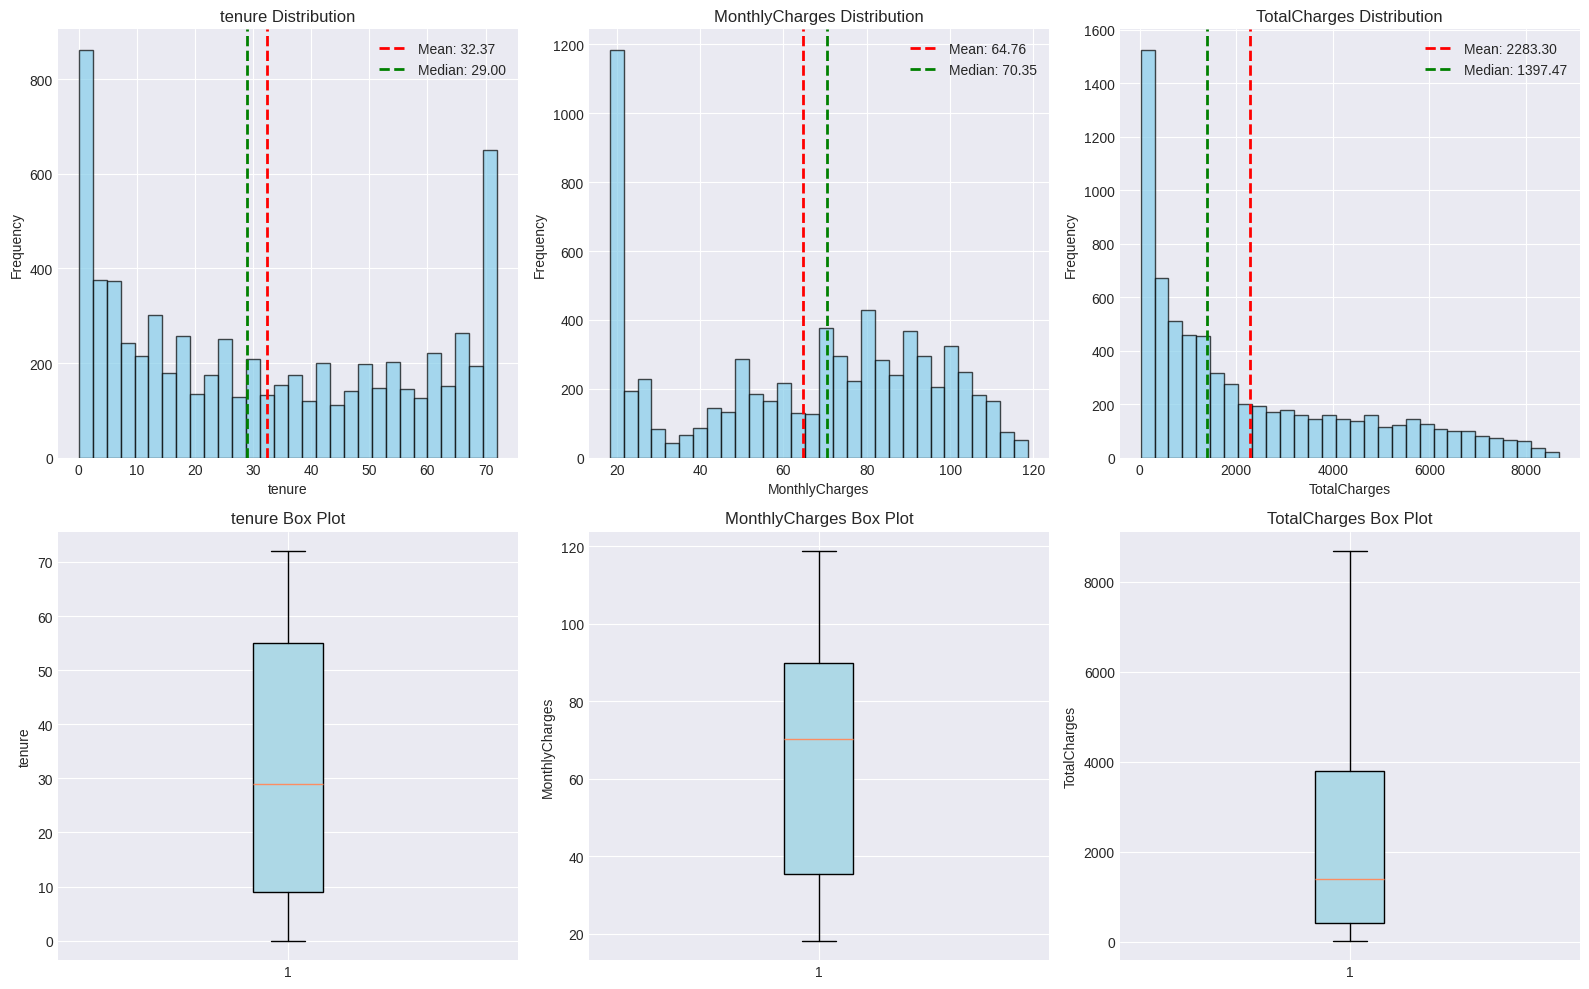

------------------------------------------------------------
CORRELATION ANALYSIS:
------------------------------------------------------------


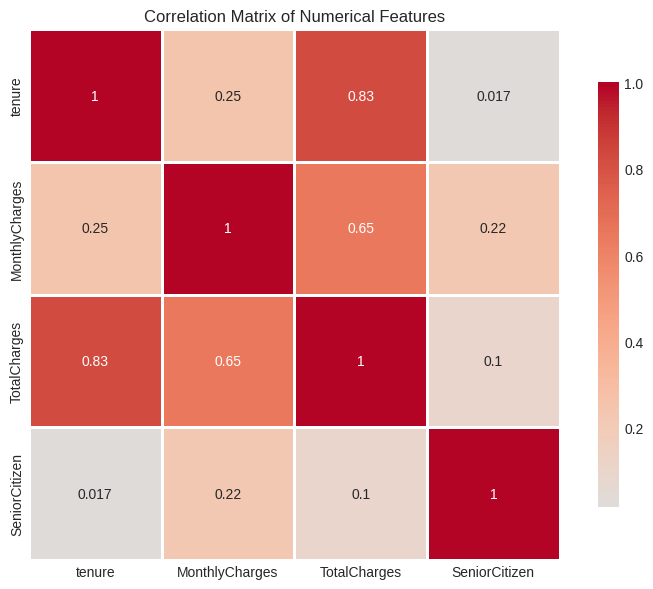

Correlation matrix:
                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen
tenure          1.000000        0.247900      0.825880       0.016567
MonthlyCharges  0.247900        1.000000      0.651065       0.220173
TotalCharges    0.825880        0.651065      1.000000       0.102411
SeniorCitizen   0.016567        0.220173      0.102411       1.000000
------------------------------------------------------------
TENURE ANALYSIS BY CHURN STATUS:
------------------------------------------------------------


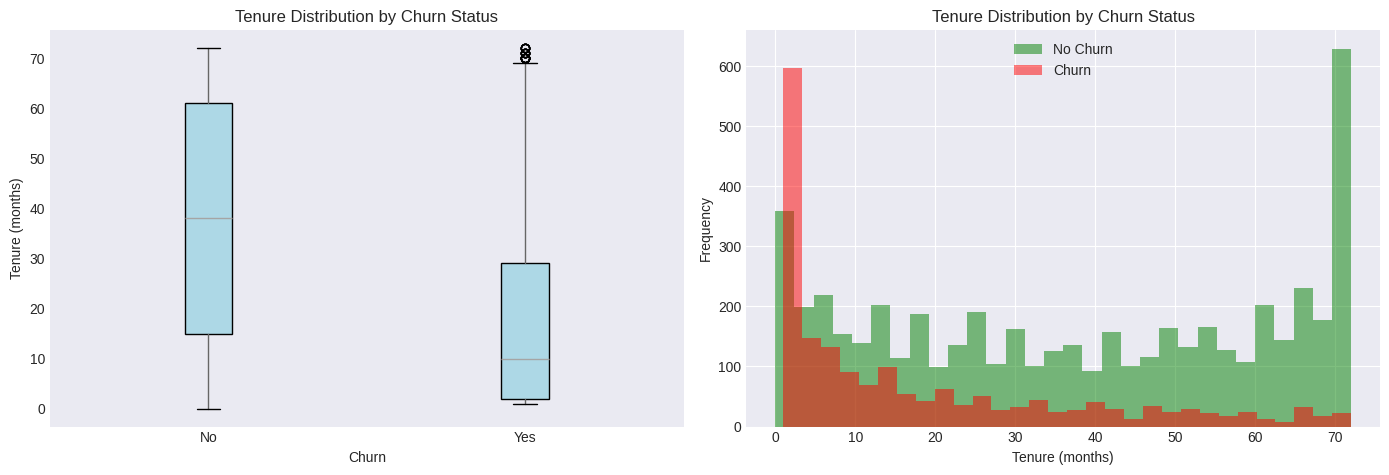


Tenure statistics by churn status:
            mean  median        std  min  max
Churn                                        
No     37.569965    38.0  24.113777    0   72
Yes    17.979133    10.0  19.531123    1   72
------------------------------------------------------------
MONTHLY CHARGES ANALYSIS BY CHURN STATUS:
------------------------------------------------------------


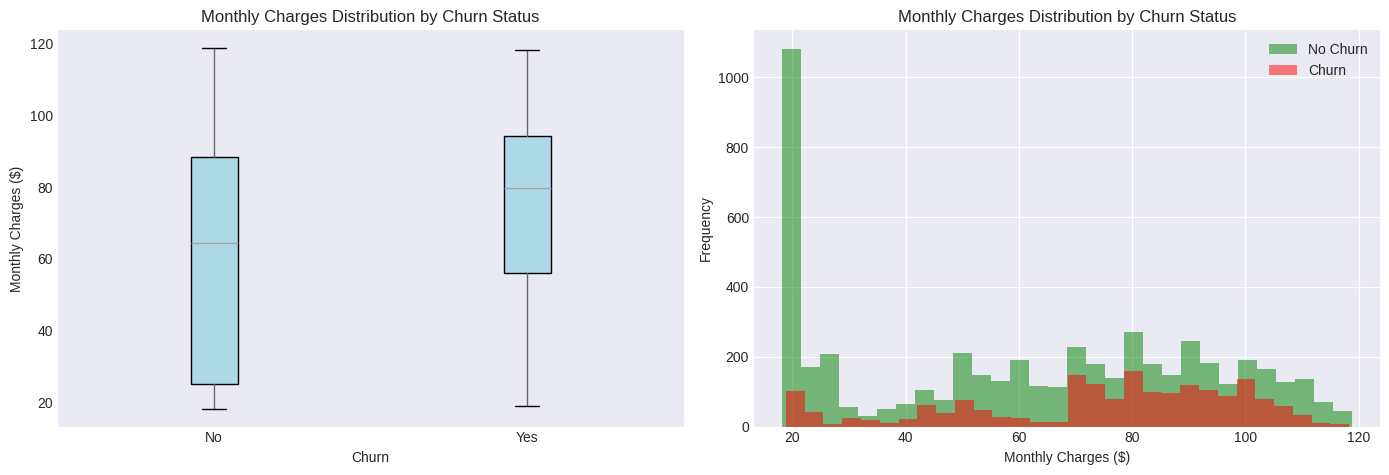


Monthly charges statistics by churn status:
            mean  median        std    min     max
Churn                                             
No     61.265124  64.425  31.092648  18.25  118.75
Yes    74.441332  79.650  24.666053  18.85  118.35
------------------------------------------------------------
TOP 10 FEATURES WITH HIGHEST CHURN RATE DIFFERENCES:
------------------------------------------------------------
Contract: 39.88% difference between highest and lowest groups
InternetService: 34.49% difference between highest and lowest groups
OnlineSecurity: 34.36% difference between highest and lowest groups
TechSupport: 34.23% difference between highest and lowest groups
OnlineBackup: 32.52% difference between highest and lowest groups
DeviceProtection: 31.72% difference between highest and lowest groups
PaymentMethod: 30.04% difference between highest and lowest groups
StreamingMovies: 26.28% difference between highest and lowest groups
StreamingTV: 26.12% difference between h

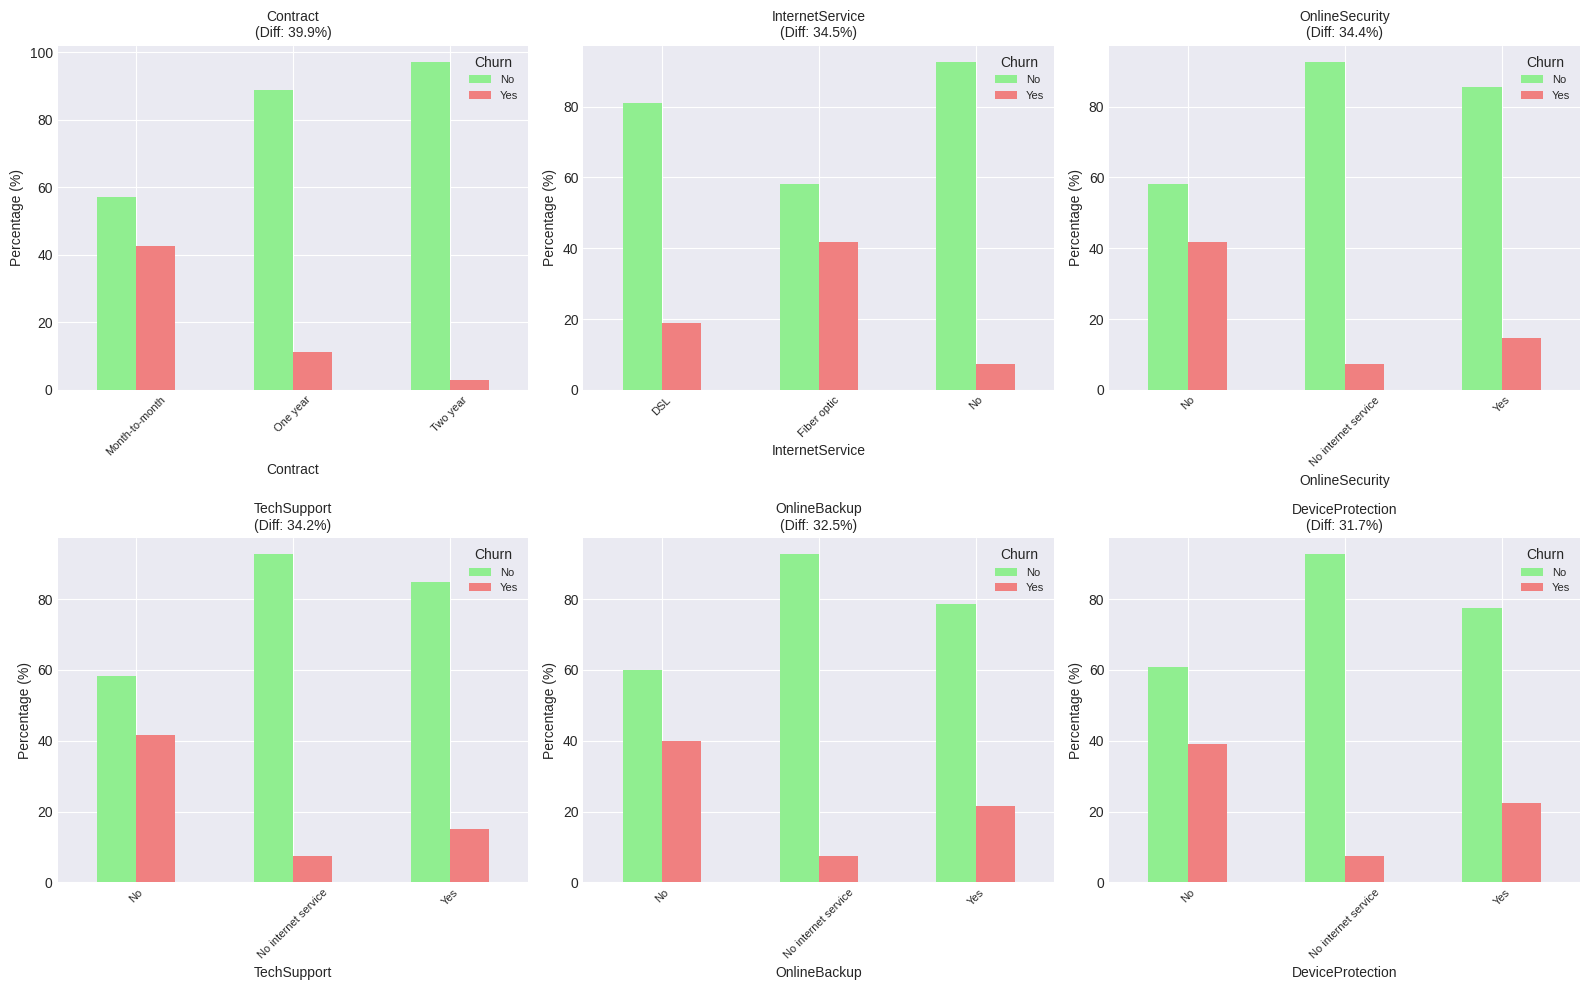

------------------------------------------------------------
CUSTOMER LIFETIME VALUE (CLV) ANALYSIS:
------------------------------------------------------------


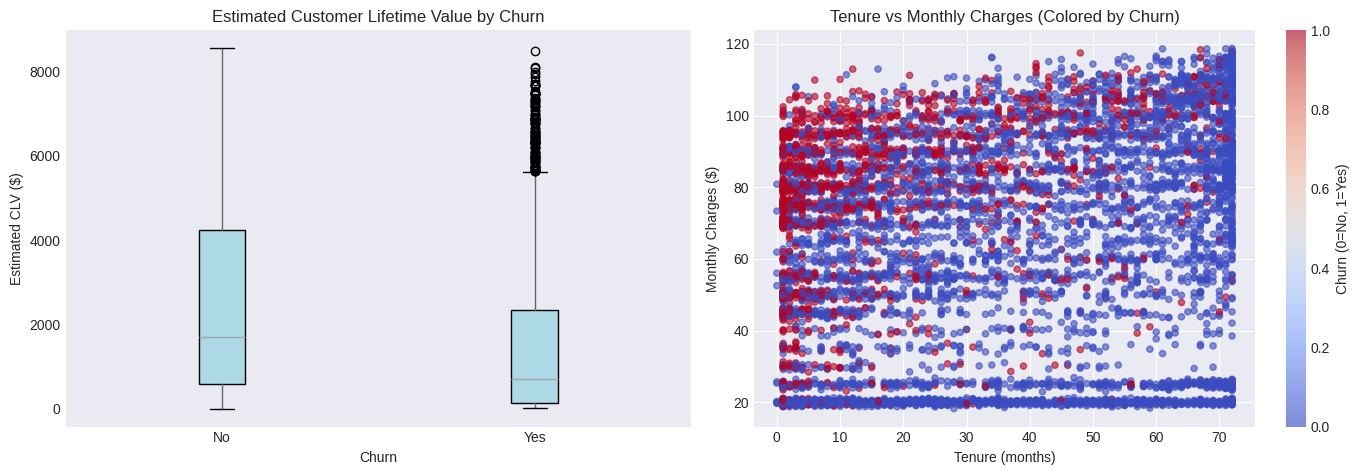

------------------------------------------------------------
DATA QUALITY SUMMARY:
------------------------------------------------------------
Total records: 7043
Total columns: 22
Missing values: 11
Duplicate records: 0
Memory usage: 6.56 MB

Column data types:
object     17
float64     3
int64       2
Name: count, dtype: int64

Unique values per categorical column:
customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
Churn: 2 unique values
------------------------------------------------------------


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Coursework/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information
print("DATASET OVERVIEW")
print("-" * 60)
print(f"Shape of dataset: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())
print("-" * 60)

# Display first few rows
print("\nFIRST 5 ROWS OF DATASET:")
print("-" * 60)
print(df.head())
print("-" * 60)

# Basic dataset information
print("\nDATASET INFORMATION:")
print("-" * 60)
print(df.info())
print("-" * 60)

# Check for missing values
print("\nMISSING VALUES ANALYSIS:")
print("-" * 60)
missing_values = df.isnull().sum()
missing_percent = (missing_values[missing_values > 0] / len(df)) * 100
print("Missing values per column:")
for col, count in missing_values[missing_values > 0].items():
    print(f"{col}: {count} missing values ({missing_percent[col]:.2f}%)")

# Check for empty strings or special missing values
print("\nChecking for empty strings or special missing values...")
empty_strings = {}
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col] == '').sum()
        if empty_count > 0:
            empty_strings[col] = empty_count

if empty_strings:
    for col, count in empty_strings.items():
        print(f"{col}: {count} empty strings")
else:
    print("No empty strings found in text columns")
print("-" * 60)

# Check the TotalCharges column specifically (noticed some issues)
print("\nSPECIAL CHECK FOR TOTALCHARGES COLUMN:")
print("-" * 60)
print("Unique values in TotalCharges (first 20):")
print(df['TotalCharges'].unique()[:20])
print(f"\nData type of TotalCharges: {df['TotalCharges'].dtype}")

# Convert TotalCharges to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"\nAfter conversion, missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Statistical summary
print("-" * 60)
print("STATISTICAL SUMMARY OF NUMERICAL COLUMNS:")
print("-" * 60)
print(df.describe())
print("-" * 60)

print("\nSTATISTICAL SUMMARY OF CATEGORICAL COLUMNS:")
print("-" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'customerID':  # Skip customer ID
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 5 values:")
        print(df[col].value_counts().head())
print("-" * 60)

# TARGET VARIABLE ANALYSIS
print("-" * 60)
print("TARGET VARIABLE ANALYSIS (CHURN):")
print("-" * 60)
churn_dist = df['Churn'].value_counts()
churn_percent = churn_dist / len(df) * 100

print(f"Churn Distribution:")
print(f"No:  {churn_dist['No']} ({churn_percent['No']:.2f}%)")
print(f"Yes: {churn_dist['Yes']} ({churn_percent['Yes']:.2f}%)")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
axes[0].pie(churn_dist.values, labels=churn_dist.index, autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90)
axes[0].set_title('Churn Distribution (Percentage)')

# Bar chart
bars = axes[1].bar(churn_dist.index, churn_dist.values, color=['lightgreen', 'lightcoral'])
axes[1].set_title('Churn Distribution (Count)')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Number of Customers')

# Add count labels on bars
for bar, count in zip(bars, churn_dist.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{count}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# DEMOGRAPHIC ANALYSIS
print("-" * 60)
print("DEMOGRAPHIC ANALYSIS:")
print("-" * 60)

demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    if col == 'SeniorCitizen':
        # Map 0/1 to No/Yes for better readability
        data = df[col].map({0: 'No', 1: 'Yes'})
    else:
        data = df[col]

    value_counts = data.value_counts()

    # Create subplot
    bars = axes[idx].bar(value_counts.index, value_counts.values, color=plt.cm.Set3(range(len(value_counts))))
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

    # Add count labels
    for bar, count in zip(bars, value_counts.values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + 50,
                      f'{count}\n({height/len(df)*100:.1f}%)',
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Churn rate by demographic factors
print("-" * 60)
print("CHURN RATE BY DEMOGRAPHIC FACTORS:")
print("-" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    if col == 'SeniorCitizen':
        df_temp = df.copy()
        df_temp[col] = df_temp[col].map({0: 'No', 1: 'Yes'})
        churn_by_group = df_temp.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100
    else:
        churn_by_group = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100

    # Plot
    churn_by_group.plot(kind='bar', ax=axes[idx], color=['lightgreen', 'lightcoral'])
    axes[idx].set_title(f'Churn Rate by {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Churn', loc='upper right')
    axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# SERVICE ANALYSIS
print("-" * 60)
print("SERVICE ANALYSIS:")
print("-" * 60)

service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure for service distribution
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(service_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        bars = axes[idx].bar(range(len(value_counts)), value_counts.values,
                           color=plt.cm.Set3(range(len(value_counts))))
        axes[idx].set_title(f'{col} Distribution', fontsize=10)
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylabel('Count')

        # Add count labels (simplified for readability)
        max_height = max(value_counts.values)
        for i, (bar, count) in enumerate(zip(bars, value_counts.values)):
            if count > max_height * 0.05:  # Only label if bar is tall enough
                height = bar.get_height()
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + max_height*0.01,
                              f'{count}\n({height/len(df)*100:.1f}%)',
                              ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

# CONTRACT AND BILLING ANALYSIS
print("-" * 60)
print("CONTRACT AND BILLING ANALYSIS:")
print("-" * 60)

contract_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(contract_cols):
    value_counts = df[col].value_counts()
    bars = axes[idx].bar(range(len(value_counts)), value_counts.values,
                       color=plt.cm.Set3(range(len(value_counts))))
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Count')

    # Add count labels
    max_height = max(value_counts.values)
    for bar, count in zip(bars, value_counts.values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + max_height*0.01,
                      f'{count}\n({height/len(df)*100:.1f}%)',
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Churn rate by contract type and payment method
print("-" * 60)
print("CHURN RATE BY CONTRACT TYPE AND PAYMENT METHOD:")
print("-" * 60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod']):
    churn_by_group = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100
    churn_by_group.plot(kind='bar', ax=axes[idx], color=['lightgreen', 'lightcoral'])
    axes[idx].set_title(f'Churn Rate by {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Churn', loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# NUMERICAL FEATURES ANALYSIS
print("-" * 60)
print("NUMERICAL FEATURES ANALYSIS:")
print("-" * 60)

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(f"Numerical columns: {numerical_cols}")

# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Histograms
for idx, col in enumerate(numerical_cols):
    axes[0, idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{col} Distribution')
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[0, idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[0, idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0, idx].legend()

# Box plots
for idx, col in enumerate(numerical_cols):
    axes[1, idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue'))
    axes[1, idx].set_title(f'{col} Box Plot')
    axes[1, idx].set_ylabel(col)

plt.tight_layout()
plt.show()

# Correlation analysis
print("-" * 60)
print("CORRELATION ANALYSIS:")
print("-" * 60)

# Select only numerical columns for correlation
corr_df = df[numerical_cols + ['SeniorCitizen']].copy()  # Include SeniorCitizen as numeric
corr_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(corr_matrix)

# TENURE ANALYSIS BY CHURN
print("-" * 60)
print("TENURE ANALYSIS BY CHURN STATUS:")
print("-" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='tenure', by='Churn', ax=axes[0], grid=False,
           patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Tenure Distribution by Churn Status')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure (months)')

# Histogram with overlay
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']

axes[1].hist(churn_no, bins=30, alpha=0.5, label='No Churn', color='green')
axes[1].hist(churn_yes, bins=30, alpha=0.5, label='Churn', color='red')
axes[1].set_title('Tenure Distribution by Churn Status')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.suptitle('')
plt.tight_layout()
plt.show()

# Calculate statistics
tenure_stats = df.groupby('Churn')['tenure'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nTenure statistics by churn status:")
print(tenure_stats)

# MONTHLY CHARGES ANALYSIS BY CHURN
print("-" * 60)
print("MONTHLY CHARGES ANALYSIS BY CHURN STATUS:")
print("-" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0], grid=False,
           patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Monthly Charges Distribution by Churn Status')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges ($)')

# Histogram with overlay
churn_yes_mc = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no_mc = df[df['Churn'] == 'No']['MonthlyCharges']

axes[1].hist(churn_no_mc, bins=30, alpha=0.5, label='No Churn', color='green')
axes[1].hist(churn_yes_mc, bins=30, alpha=0.5, label='Churn', color='red')
axes[1].set_title('Monthly Charges Distribution by Churn Status')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.suptitle('')
plt.tight_layout()
plt.show()

# Calculate statistics
monthly_stats = df.groupby('Churn')['MonthlyCharges'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nMonthly charges statistics by churn status:")
print(monthly_stats)

# FEATURE IMPORTANCE - CHURN RATE BY DIFFERENT CATEGORIES
print("-" * 60)
print("TOP 10 FEATURES WITH HIGHEST CHURN RATE DIFFERENCES:")
print("-" * 60)

# Calculate churn rate for different categorical features
churn_rates = {}
for col in categorical_cols:
    if col not in ['customerID', 'Churn']:
        churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
        # Calculate difference between max and min churn rate
        rate_diff = churn_rate.max() - churn_rate.min()
        churn_rates[col] = rate_diff

# Sort by difference (descending)
sorted_churn_rates = sorted(churn_rates.items(), key=lambda x: x[1], reverse=True)[:10]

for col, diff in sorted_churn_rates:
    print(f"{col}: {diff:.2f}% difference between highest and lowest groups")

# Visualize top 5
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, (col, diff) in enumerate(sorted_churn_rates[:6]):
    churn_by_group = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100

    if len(churn_by_group) <= 10:  # Only plot if reasonable number of categories
        churn_by_group.plot(kind='bar', ax=axes[idx], color=['lightgreen', 'lightcoral'])
        axes[idx].set_title(f'{col}\n(Diff: {diff:.1f}%)', fontsize=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Percentage (%)')
        axes[idx].legend(title='Churn', fontsize=8)
        axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    else:
        axes[idx].text(0.5, 0.5, f'Too many categories\n({len(churn_by_group)})',
                      ha='center', va='center', transform=axes[idx].transAxes)
        axes[idx].set_title(f'{col} (Skipped)', fontsize=10)

# Hide unused subplots
for idx in range(len(sorted_churn_rates[:6]), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# CUSTOMER LIFETIME VALUE ANALYSIS
print("-" * 60)
print("CUSTOMER LIFETIME VALUE (CLV) ANALYSIS:")
print("-" * 60)

# Create estimated CLV (simplified)
df['Estimated_CLV'] = df['tenure'] * df['MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot of CLV by churn
df.boxplot(column='Estimated_CLV', by='Churn', ax=axes[0], grid=False,
           patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Estimated Customer Lifetime Value by Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Estimated CLV ($)')

# Scatter plot: Tenure vs Monthly Charges colored by Churn
scatter = axes[1].scatter(df['tenure'], df['MonthlyCharges'],
                         c=df['Churn'].map({'No': 0, 'Yes': 1}),
                         cmap='coolwarm', alpha=0.6, s=20)
axes[1].set_title('Tenure vs Monthly Charges (Colored by Churn)')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Monthly Charges ($)')
plt.colorbar(scatter, ax=axes[1], label='Churn (0=No, 1=Yes)')

plt.suptitle('')
plt.tight_layout()
plt.show()

# DATA QUALITY SUMMARY
print("-" * 60)
print("DATA QUALITY SUMMARY:")
print("-" * 60)

print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate records: {df.duplicated().sum()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn data types:")
print(df.dtypes.value_counts())

print("\nUnique values per categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
print("-" * 60)

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class TelcoChurnPreprocessor:
    """
    Simple preprocessing pipeline for Telco Customer Churn dataset
    Removes missing values and performs basic encoding
    """

    def __init__(self, test_size=0.2, random_state=42):
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()

    def load_and_clean(self, filepath):
        """Load the raw data and remove rows with missing values"""
        print("Loading and cleaning data...")
        df = pd.read_csv(filepath)

        # Save original shape
        self.original_shape = df.shape
        print(f"Original data shape: {self.original_shape}")

        # Convert TotalCharges to numeric
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

        # Check for missing values
        missing_values = df.isnull().sum()
        if missing_values.sum() > 0:
            print(f"Missing values found: \n{missing_values[missing_values > 0]}")

            # Remove rows with missing values
            df = df.dropna()
            print(f"Removed rows with missing values")

        # Drop customerID (not useful for modeling)
        if 'customerID' in df.columns:
            df = df.drop('customerID', axis=1)

        print(f"After cleaning shape: {df.shape}")
        print(f"Removed {self.original_shape[0] - df.shape[0]} rows")
        return df

    def encode_categorical(self, df):
        """Encode categorical variables - no new features added"""
        print("\nEncoding categorical variables...")
        df_encoded = df.copy()

        # Store mapping dictionaries for reference
        self.encoding_maps = {}

        # 1. Binary encoding (Yes/No columns)
        binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                      'PaperlessBilling', 'Churn']

        binary_mapping = {
            'gender': {'Female': 0, 'Male': 1},
            'Partner': {'No': 0, 'Yes': 1},
            'Dependents': {'No': 0, 'Yes': 1},
            'PhoneService': {'No': 0, 'Yes': 1},
            'PaperlessBilling': {'No': 0, 'Yes': 1},
            'Churn': {'No': 0, 'Yes': 1}
        }

        for col in binary_cols:
            if col in df_encoded.columns:
                df_encoded[col] = df_encoded[col].map(binary_mapping[col])
                self.encoding_maps[col] = binary_mapping[col]

        # IMPORTANT: SeniorCitizen is already 0/1, leave it as is

        # 2. Service features encoding
        service_mapping = {'No': 0, 'No internet service': 0, 'No phone service': 0, 'Yes': 1}
        service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

        for col in service_cols:
            if col in df_encoded.columns:
                df_encoded[col] = df_encoded[col].map(service_mapping)
                self.encoding_maps[col] = service_mapping

        # 3. One-hot encoding for nominal features
        nominal_cols = ['InternetService', 'Contract', 'PaymentMethod']

        # Filter to columns that exist
        nominal_cols = [col for col in nominal_cols if col in df_encoded.columns]

        if nominal_cols:
            df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)
            print(f"Created {len([c for c in df_encoded.columns if any(n in c for n in nominal_cols)])} one-hot encoded columns")

        return df_encoded

    def split_data(self, X, y):
        """Split data into train and test sets"""
        print("\nSplitting data into train/test sets...")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=self.test_size,
            random_state=self.random_state,
            stratify=y
        )

        print(f"Training set: {X_train.shape}")
        print(f"Test set: {X_test.shape}")
        print(f"Train churn rate: {y_train.mean():.2%}")
        print(f"Test churn rate: {y_test.mean():.2%}")

        return X_train, X_test, y_train, y_test

    def scale_features(self, X_train, X_test):
        """Scale only continuous features, leave binary features as 0/1"""
        print("\nScaling continuous features...")

        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()

        # Identify binary features (should NOT be scaled)
        binary_features = [
            'gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'PaperlessBilling'
        ]

        # Add service features (already encoded as 0/1)
        service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
        binary_features.extend(service_cols)

        # Add one-hot encoded columns (already 0/1)
        onehot_encoded_cols = [col for col in X_train.columns
                              if any(prefix in col for prefix in ['InternetService_', 'Contract_',
                                                                 'PaymentMethod_'])]
        binary_features.extend(onehot_encoded_cols)

        # Filter to columns that actually exist
        binary_features = [col for col in binary_features if col in X_train.columns]

        # Identify continuous features to scale
        continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        continuous_features = [col for col in continuous_features if col in X_train.columns]

        print(f"Binary features (will NOT be scaled): {len(binary_features)}")
        print(f"Continuous features (will be scaled): {len(continuous_features)}")

        if continuous_features:
            # Scale training data
            X_train_scaled[continuous_features] = self.scaler.fit_transform(X_train[continuous_features])

            # Scale test data using training parameters
            X_test_scaled[continuous_features] = self.scaler.transform(X_test[continuous_features])

        # Verify binary features are still 0/1
        print("\nVerifying binary features remain 0/1:")
        for col in ['SeniorCitizen', 'gender', 'Partner', 'Dependents']:
            if col in X_train_scaled.columns:
                unique_vals = sorted(X_train_scaled[col].unique())
                print(f"  {col}: {unique_vals} {'✓' if set(unique_vals).issubset({0, 1}) else '✗'}")

        return X_train_scaled, X_test_scaled

    def full_pipeline(self, data_path, save_processed=True):
        """Run complete preprocessing pipeline"""
        print("=" * 60)
        print("TELCO CHURN PREPROCESSING PIPELINE")
        print("=" * 60)
        print("No new features added, only basic preprocessing")

        # 1. Load and clean (remove rows with missing values)
        df_clean = self.load_and_clean(data_path)

        # 2. Encode categorical (no feature engineering)
        df_encoded = self.encode_categorical(df_clean)

        # 3. Separate features and target
        X = df_encoded.drop('Churn', axis=1)
        y = df_encoded['Churn']

        # 4. Split data
        X_train, X_test, y_train, y_test = self.split_data(X, y)

        # 5. Scale features (only continuous, not binary)
        X_train_scaled, X_test_scaled = self.scale_features(X_train, X_test)

        # RESET INDICES before concatenation
        X_train_scaled = X_train_scaled.reset_index(drop=True)
        X_test_scaled = X_test_scaled.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        # Get feature names
        feature_names = X_train_scaled.columns.tolist()

        print("\n" + "=" * 60)
        print("PREPROCESSING COMPLETE")
        print("=" * 60)
        print(f"Original shape: {self.original_shape}")
        print(f"Final training shape: {X_train_scaled.shape}")
        print(f"Final test shape: {X_test_scaled.shape}")
        print(f"Total features: {len(feature_names)}")

        # Save processed data if requested
        if save_processed:
          # Use pd.concat with reset_index to ensure alignment
          train_df = pd.concat([X_train_scaled, y_train], axis=1)
          test_df = pd.concat([X_test_scaled, y_test], axis=1)

          # Verify no NaN in Churn column
          nan_in_train = train_df['Churn'].isnull().sum()
          nan_in_test = test_df['Churn'].isnull().sum()

          if nan_in_train > 0 or nan_in_test > 0:
            print(f"\n⚠️ WARNING: Found NaN values in Churn column!")
            print(f"  Training: {nan_in_train} NaN values")
            print(f"  Test: {nan_in_test} NaN values")

            # Remove rows with NaN in Churn (shouldn't happen, but just in case)
            train_df = train_df.dropna(subset=['Churn'])
            test_df = test_df.dropna(subset=['Churn'])
            print(f"  Removed rows with NaN in Churn")

        # Ensure Churn is integer (0 or 1)
        train_df['Churn'] = train_df['Churn'].astype(int)
        test_df['Churn'] = test_df['Churn'].astype(int)

        train_df.to_csv('telco_churn_train_simple.csv', index=False)
        test_df.to_csv('telco_churn_test_simple.csv', index=False)

        return {
            'X_train': X_train_scaled,
            'X_test': X_test_scaled,
            'y_train': y_train,
            'y_test': y_test,
            'feature_names': feature_names,
            'scaler': self.scaler
        }


# ============================================================================
# USAGE EXAMPLE
# ============================================================================

if __name__ == "__main__":
    # Initialize preprocessor
    preprocessor = TelcoChurnPreprocessor(test_size=0.2, random_state=42)

    # Run complete pipeline
    results = preprocessor.full_pipeline(
        data_path='/content/drive/MyDrive/Machine Learning Coursework/WA_Fn-UseC_-Telco-Customer-Churn.csv',
        save_processed=True
    )

    # Access processed data
    X_train = results['X_train']
    X_test = results['X_test']
    y_train = results['y_train']
    y_test = results['y_test']
    feature_names = results['feature_names']

    # Display sample of processed data
    print("\nSample of processed training data (first 5 rows):")
    sample_cols = ['SeniorCitizen', 'gender', 'Partner', 'Dependents',
                   'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
    sample_cols = [col for col in sample_cols if col in feature_names + ['Churn']]

    train_df = pd.concat([X_train, pd.Series(y_train.values, name='Churn')], axis=1)
    print(train_df[sample_cols].head())

    # Feature statistics
    print("\nFeature Statistics:")
    print("-" * 40)
    print(f"Total features: {len(feature_names)}")

    # Class distribution
    print("\nClass Distribution:")
    print("-" * 40)
    print(f"Training - Churn: {y_train.sum()} ({y_train.mean():.2%})")
    print(f"Training - No Churn: {len(y_train) - y_train.sum()} ({1 - y_train.mean():.2%})")
    print(f"Test - Churn: {y_test.sum()} ({y_test.mean():.2%})")
    print(f"Test - No Churn: {len(y_test) - y_test.sum()} ({1 - y_test.mean():.2%})")


# ============================================================================
# QUICK PREPROCESSING FUNCTION
# ============================================================================

def simple_preprocess_telco(filepath, save_processed=True):
    """
    Simple preprocessing function for Telco Churn dataset
    Removes missing values, basic encoding, no feature engineering
    """
    # Load data
    df = pd.read_csv(filepath)

    # Convert TotalCharges and remove rows with missing values
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna()
    df = df.drop('customerID', axis=1)

    # Binary encoding
    binary_map = {'Female': 0, 'Male': 1, 'No': 0, 'Yes': 1}
    for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
        df[col] = df[col].map(binary_map)

    # Service encoding
    service_map = {'No': 0, 'No internet service': 0, 'No phone service': 0, 'Yes': 1}
    for col in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']:
        df[col] = df[col].map(service_map)

    # One-hot encoding
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    # Separate features and target
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Identify continuous vs binary features
    binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'PaperlessBilling'] + \
                  ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies'] + \
                  [col for col in X_train.columns if any(prefix in col for prefix in
                    ['InternetService_', 'Contract_', 'PaymentMethod_'])]

    continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    continuous_cols = [col for col in continuous_cols if col in X_train.columns]

    # Scale only continuous features
    scaler = StandardScaler()
    if continuous_cols:
        X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
        X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

    # Combine back
    train_processed = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    test_processed = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

    if save_processed:
        train_processed.to_csv('telco_churn_simple_train.csv', index=False)
        test_processed.to_csv('telco_churn_simple_test.csv', index=False)
        print("Simple-processed data saved")

    return train_processed, test_processed, scaler

TELCO CHURN PREPROCESSING PIPELINE
No new features added, only basic preprocessing
Loading and cleaning data...
Original data shape: (7043, 21)
Missing values found: 
TotalCharges    11
dtype: int64
Removed rows with missing values
After cleaning shape: (7032, 20)
Removed 11 rows

Encoding categorical variables...
Created 7 one-hot encoded columns

Splitting data into train/test sets...
Training set: (5625, 23)
Test set: (1407, 23)
Train churn rate: 26.58%
Test churn rate: 26.58%

Scaling continuous features...
Binary features (will NOT be scaled): 20
Continuous features (will be scaled): 3

Verifying binary features remain 0/1:
  SeniorCitizen: [np.int64(0), np.int64(1)] ✓
  gender: [np.int64(0), np.int64(1)] ✓
  Partner: [np.int64(0), np.int64(1)] ✓
  Dependents: [np.int64(0), np.int64(1)] ✓

PREPROCESSING COMPLETE
Original shape: (7043, 21)
Final training shape: (5625, 23)
Final test shape: (1407, 23)
Total features: 23

Sample of processed training data (first 5 rows):
   SeniorCit

# Model Training and Comparision

1. LOADING PREPROCESSED DATA
Training data shape: (5625, 24)
Test data shape: (1407, 24)

--------------------------------------------------------------------------------
2. DATA PREPARATION FOR MODELING
--------------------------------------------------------------------------------
Features shape: (5625, 23)
Target shape: (5625,)

Feature names (23 total):
   1. gender
   2. SeniorCitizen
   3. Partner
   4. Dependents
   5. tenure
   6. PhoneService
   7. MultipleLines
   8. OnlineSecurity
   9. OnlineBackup
  10. DeviceProtection
  ... and 13 more

Class distribution:
Training - Churn: 1495 (26.58%)
Training - No Churn: 4130 (73.42%)
Test - Churn: 374 (26.58%)
Test - No Churn: 1033 (73.42%)

Verifying binary features:
  SeniorCitizen: [np.int64(0), np.int64(1)] ✓
  gender: [np.int64(0), np.int64(1)] ✓
  Partner: [np.int64(0), np.int64(1)] ✓
  Dependents: [np.int64(0), np.int64(1)] ✓
  PhoneService: [np.int64(0), np.int64(1)] ✓
  PaperlessBilling: [np.int64(0), np.int64(1)] ✓

3. DE

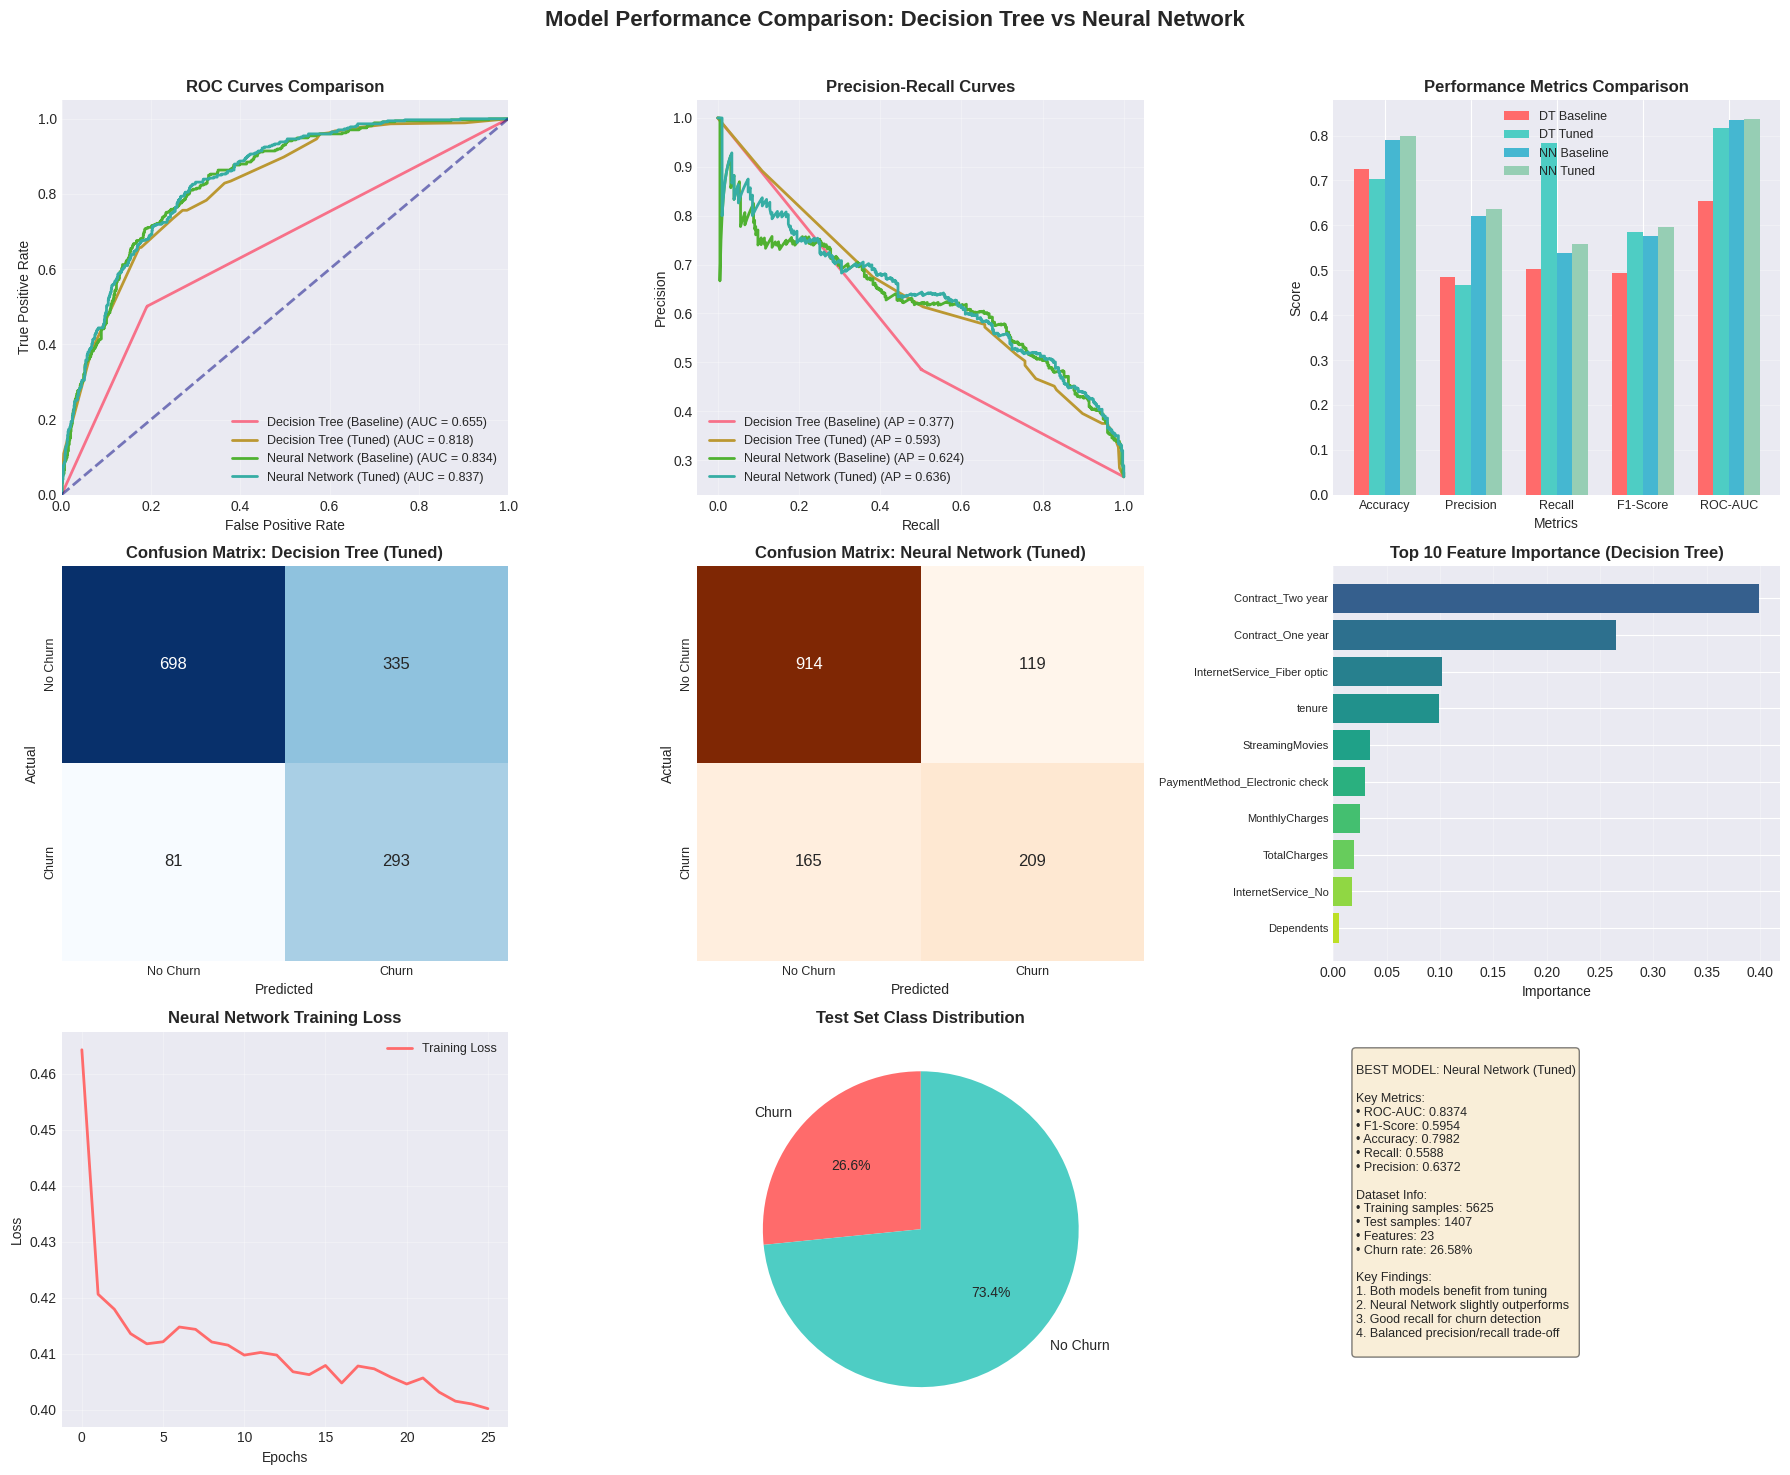


--------------------------------------------------------------------------------
5.3 DETAILED CLASSIFICATION REPORTS
--------------------------------------------------------------------------------

Decision Tree (Tuned) Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407


Neural Network (Tuned) Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, auc,
                           precision_recall_curve, average_precision_score)
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. LOAD PREPROCESSED DATA
# ============================================================================

print("=" * 80)
print("1. LOADING PREPROCESSED DATA")
print("=" * 80)

# Load the preprocessed data
train_df = pd.read_csv('telco_churn_train_simple.csv')
test_df = pd.read_csv('telco_churn_test_simple.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# ============================================================================
# 2. PREPARE DATA FOR MODELING
# ============================================================================

print("\n" + "-" * 80)
print("2. DATA PREPARATION FOR MODELING")
print("-" * 80)

# Separate features and target
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

# Convert Churn to integer (ensure it's 0/1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(f"Features shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")
print(f"\nFeature names ({len(X_train.columns)} total):")
for i, col in enumerate(X_train.columns[:10], 1):
    print(f"  {i:2d}. {col}")
if len(X_train.columns) > 10:
    print(f"  ... and {len(X_train.columns) - 10} more")

print(f"\nClass distribution:")
print(f"Training - Churn: {y_train.sum()} ({y_train.mean():.2%})")
print(f"Training - No Churn: {len(y_train) - y_train.sum()} ({1 - y_train.mean():.2%})")
print(f"Test - Churn: {y_test.sum()} ({y_test.mean():.2%})")
print(f"Test - No Churn: {len(y_test) - y_test.sum()} ({1 - y_test.mean():.2%})")

# Verify binary features are indeed 0/1
print(f"\nVerifying binary features:")
binary_check_cols = ['SeniorCitizen', 'gender', 'Partner', 'Dependents',
                     'PhoneService', 'PaperlessBilling']
for col in binary_check_cols:
    if col in X_train.columns:
        unique_vals = sorted(X_train[col].unique())
        is_binary = set(unique_vals).issubset({0, 1})
        print(f"  {col}: {unique_vals} {'✓' if is_binary else '✗'}")

# ============================================================================
# 3. DECISION TREE CLASSIFIER
# ============================================================================

print("\n" + "=" * 80)
print("3. DECISION TREE CLASSIFIER")
print("=" * 80)

# ============================================================================
# 3.1 Baseline Decision Tree
# ============================================================================

print("\n" + "-" * 80)
print("3.1 BASELINE DECISION TREE")
print("-" * 80)

# Initialize baseline model
dt_baseline = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Train model
dt_baseline.fit(X_train, y_train)

# Make predictions
y_pred_dt_baseline = dt_baseline.predict(X_test)
y_pred_proba_dt_baseline = dt_baseline.predict_proba(X_test)[:, 1]

# Calculate metrics
dt_baseline_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt_baseline),
    'Precision': precision_score(y_test, y_pred_dt_baseline, zero_division=0),
    'Recall': recall_score(y_test, y_pred_dt_baseline),
    'F1-Score': f1_score(y_test, y_pred_dt_baseline),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt_baseline)
}

print("\nBaseline Decision Tree Performance:")
for metric, value in dt_baseline_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Cross-validation score
cv_scores_dt = cross_val_score(dt_baseline, X_train, y_train,
                               cv=5, scoring='roc_auc')
print(f"  Cross-validation ROC-AUC (5-fold): {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std():.4f})")

# ============================================================================
# 3.2 Hyperparameter Tuning for Decision Tree
# ============================================================================

print("\n" + "-" * 80)
print("3.2 HYPERPARAMETER TUNING FOR DECISION TREE")
print("-" * 80)

# Define parameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search for Decision Tree...")
grid_search_dt.fit(X_train, y_train)

print(f"\nBest parameters found:")
for param, value in grid_search_dt.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best cross-validation ROC-AUC: {grid_search_dt.best_score_:.4f}")

# Get best model
dt_tuned = grid_search_dt.best_estimator_

# Make predictions with tuned model
y_pred_dt_tuned = dt_tuned.predict(X_test)
y_pred_proba_dt_tuned = dt_tuned.predict_proba(X_test)[:, 1]

# Calculate metrics for tuned model
dt_tuned_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt_tuned),
    'Precision': precision_score(y_test, y_pred_dt_tuned, zero_division=0),
    'Recall': recall_score(y_test, y_pred_dt_tuned),
    'F1-Score': f1_score(y_test, y_pred_dt_tuned),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt_tuned)
}

print("\nTuned Decision Tree Performance:")
for metric, value in dt_tuned_metrics.items():
    print(f"  {metric}: {value:.4f}")

# ============================================================================
# 3.3 Decision Tree Feature Importance
# ============================================================================

print("\n" + "-" * 80)
print("3.3 DECISION TREE FEATURE IMPORTANCE")
print("-" * 80)

if hasattr(dt_tuned, 'feature_importances_'):
    importances = dt_tuned.feature_importances_

    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print("-" * 40)
    for i, row in feature_importance_df.head(10).iterrows():
        print(f"{i+1:2d}. {row['Feature']}: {row['Importance']:.4f}")

    # Categorize features
    categories = {
        'Contract & Tenure': ['Contract', 'tenure'],
        'Billing & Charges': ['MonthlyCharges', 'TotalCharges', 'PaperlessBilling'],
        'Services': ['InternetService', 'Streaming', 'OnlineSecurity', 'TechSupport'],
        'Customer Profile': ['SeniorCitizen', 'Partner', 'Dependents', 'gender']
    }

    print("\nFeature Importance by Category:")
    print("-" * 40)
    for category, keywords in categories.items():
        category_importance = 0
        category_features = []

        for feature in feature_importance_df['Feature']:
            if any(keyword.lower() in str(feature).lower() for keyword in keywords):
                importance = feature_importance_df[feature_importance_df['Feature'] == feature]['Importance'].values[0]
                category_importance += importance
                category_features.append(feature)

        if category_features:
            print(f"\n{category}: {category_importance:.3f}")
            for feature in category_features[:3]:  # Show top 3 per category
                importance = feature_importance_df[feature_importance_df['Feature'] == feature]['Importance'].values[0]
                print(f"  • {feature}: {importance:.4f}")

# ============================================================================
# 4. NEURAL NETWORK CLASSIFIER (MLP)
# ============================================================================

print("\n" + "=" * 80)
print("4. NEURAL NETWORK CLASSIFIER (MLP)")
print("=" * 80)

# ============================================================================
# 4.1 Baseline Neural Network
# ============================================================================

print("\n" + "-" * 80)
print("4.1 BASELINE NEURAL NETWORK")
print("-" * 80)

# Initialize baseline model
nn_baseline = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10
)

# Train model
nn_baseline.fit(X_train, y_train)

# Make predictions
y_pred_nn_baseline = nn_baseline.predict(X_test)
y_pred_proba_nn_baseline = nn_baseline.predict_proba(X_test)[:, 1]

# Calculate metrics
nn_baseline_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nn_baseline),
    'Precision': precision_score(y_test, y_pred_nn_baseline, zero_division=0),
    'Recall': recall_score(y_test, y_pred_nn_baseline),
    'F1-Score': f1_score(y_test, y_pred_nn_baseline),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_nn_baseline)
}

print("\nBaseline Neural Network Performance:")
for metric, value in nn_baseline_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Cross-validation score
cv_scores_nn = cross_val_score(nn_baseline, X_train, y_train,
                               cv=3, scoring='roc_auc')  # Fewer folds due to longer training
print(f"  Cross-validation ROC-AUC (3-fold): {cv_scores_nn.mean():.4f} (±{cv_scores_nn.std():.4f})")

# ============================================================================
# 4.2 Hyperparameter Tuning for Neural Network
# ============================================================================

print("\n" + "-" * 80)
print("4.2 HYPERPARAMETER TUNING FOR NEURAL NETWORK")
print("-" * 80)

# Define parameter grid (simplified for computational efficiency)
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate_init': [0.001, 0.01]
}

# Initialize GridSearchCV with fewer folds for speed
grid_search_nn = GridSearchCV(
    estimator=MLPClassifier(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10
    ),
    param_grid=param_grid_nn,
    cv=3,  # Fewer folds due to longer training time
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search for Neural Network...")
grid_search_nn.fit(X_train, y_train)

print(f"\nBest parameters found:")
for param, value in grid_search_nn.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best cross-validation ROC-AUC: {grid_search_nn.best_score_:.4f}")

# Get best model
nn_tuned = grid_search_nn.best_estimator_

# Make predictions with tuned model
y_pred_nn_tuned = nn_tuned.predict(X_test)
y_pred_proba_nn_tuned = nn_tuned.predict_proba(X_test)[:, 1]

# Calculate metrics for tuned model
nn_tuned_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nn_tuned),
    'Precision': precision_score(y_test, y_pred_nn_tuned, zero_division=0),
    'Recall': recall_score(y_test, y_pred_nn_tuned),
    'F1-Score': f1_score(y_test, y_pred_nn_tuned),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_nn_tuned)
}

print("\nTuned Neural Network Performance:")
for metric, value in nn_tuned_metrics.items():
    print(f"  {metric}: {value:.4f}")

# ============================================================================
# 5. MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("5. MODEL COMPARISON AND VISUALIZATION")
print("=" * 80)

# ============================================================================
# 5.1 Performance Comparison Table
# ============================================================================

print("\n" + "-" * 80)
print("5.1 PERFORMANCE COMPARISON TABLE")
print("-" * 80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Decision Tree (Baseline)': dt_baseline_metrics,
    'Decision Tree (Tuned)': dt_tuned_metrics,
    'Neural Network (Baseline)': nn_baseline_metrics,
    'Neural Network (Tuned)': nn_tuned_metrics
}).T

print("\nModel Performance Comparison (Test Set):")
print("-" * 80)
print(comparison_df.round(4))

# Determine best model
best_model_name = comparison_df['ROC-AUC'].idxmax()
best_model_metrics = comparison_df.loc[best_model_name]

print(f"\n BEST MODEL: {best_model_name}")
print(f"   ROC-AUC: {best_model_metrics['ROC-AUC']:.4f}")
print(f"   F1-Score: {best_model_metrics['F1-Score']:.4f}")
print(f"   Accuracy: {best_model_metrics['Accuracy']:.4f}")

# ============================================================================
# 5.2 Visualization
# ============================================================================

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Model Performance Comparison: Decision Tree vs Neural Network',
             fontsize=16, fontweight='bold')

# 1. ROC Curves Comparison
ax1 = axes[0, 0]
models = [
    ('Decision Tree (Baseline)', y_pred_proba_dt_baseline),
    ('Decision Tree (Tuned)', y_pred_proba_dt_tuned),
    ('Neural Network (Baseline)', y_pred_proba_nn_baseline),
    ('Neural Network (Tuned)', y_pred_proba_nn_tuned)
]

for name, y_pred_proba in models:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=10)
ax1.set_ylabel('True Positive Rate', fontsize=10)
ax1.set_title('ROC Curves Comparison', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Curves
ax2 = axes[0, 1]
for name, y_pred_proba in models:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    ax2.plot(recall, precision, lw=2, label=f'{name} (AP = {avg_precision:.3f})')

ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Precision-Recall Curves', fontsize=12, fontweight='bold')
ax2.legend(loc='lower left', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Metric Comparison Bar Chart
ax3 = axes[0, 2]
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics_to_plot))
width = 0.18

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for idx, (model_name, metrics) in enumerate([
    ('DT Baseline', dt_baseline_metrics),
    ('DT Tuned', dt_tuned_metrics),
    ('NN Baseline', nn_baseline_metrics),
    ('NN Tuned', nn_tuned_metrics)
]):
    values = [metrics[metric] for metric in metrics_to_plot]
    ax3.bar(x + idx*width, values, width, label=model_name, color=colors[idx])

ax3.set_xlabel('Metrics', fontsize=10)
ax3.set_ylabel('Score', fontsize=10)
ax3.set_title('Performance Metrics Comparison', fontsize=12, fontweight='bold')
ax3.set_xticks(x + width*1.5)
ax3.set_xticklabels(metrics_to_plot, fontsize=9)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Confusion Matrix - Decision Tree Tuned
ax4 = axes[1, 0]
cm_dt = confusion_matrix(y_test, y_pred_dt_tuned)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax4, cbar=False,
            annot_kws={"size": 12})
ax4.set_xlabel('Predicted', fontsize=10)
ax4.set_ylabel('Actual', fontsize=10)
ax4.set_title('Confusion Matrix: Decision Tree (Tuned)', fontsize=12, fontweight='bold')
ax4.set_xticklabels(['No Churn', 'Churn'], fontsize=9)
ax4.set_yticklabels(['No Churn', 'Churn'], fontsize=9)

# 5. Confusion Matrix - Neural Network Tuned
ax5 = axes[1, 1]
cm_nn = confusion_matrix(y_test, y_pred_nn_tuned)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', ax=ax5, cbar=False,
            annot_kws={"size": 12})
ax5.set_xlabel('Predicted', fontsize=10)
ax5.set_ylabel('Actual', fontsize=10)
ax5.set_title('Confusion Matrix: Neural Network (Tuned)', fontsize=12, fontweight='bold')
ax5.set_xticklabels(['No Churn', 'Churn'], fontsize=9)
ax5.set_yticklabels(['No Churn', 'Churn'], fontsize=9)

# 6. Feature Importance (Decision Tree)
ax6 = axes[1, 2]
if hasattr(dt_tuned, 'feature_importances_'):
    importances = dt_tuned.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False).head(10)

    colors_bar = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance_df)))
    ax6.barh(range(len(feature_importance_df)),
            feature_importance_df['Importance'].values[::-1],
            color=colors_bar[::-1])
    ax6.set_yticks(range(len(feature_importance_df)))
    ax6.set_yticklabels(feature_importance_df['Feature'].values[::-1], fontsize=8)
    ax6.set_xlabel('Importance', fontsize=10)
    ax6.set_title('Top 10 Feature Importance (Decision Tree)', fontsize=12, fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='x')

# 7. Neural Network Training Loss
ax7 = axes[2, 0]
if hasattr(nn_tuned, 'loss_curve_'):
    ax7.plot(nn_tuned.loss_curve_, color='#FF6B6B', linewidth=2, label='Training Loss')
    ax7.set_xlabel('Epochs', fontsize=10)
    ax7.set_ylabel('Loss', fontsize=10)
    ax7.set_title('Neural Network Training Loss', fontsize=12, fontweight='bold')
    ax7.legend(fontsize=9)
    ax7.grid(True, alpha=0.3)

# 8. Class Distribution
ax8 = axes[2, 1]
churn_counts = [y_test.sum(), len(y_test) - y_test.sum()]
labels = ['Churn', 'No Churn']
colors_pie = ['#FF6B6B', '#4ECDC4']
ax8.pie(churn_counts, labels=labels, colors=colors_pie, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10})
ax8.set_title('Test Set Class Distribution', fontsize=12, fontweight='bold')

# 9. Model Comparison Summary
ax9 = axes[2, 2]
ax9.axis('off')
summary_text = f"""
BEST MODEL: {best_model_name}

Key Metrics:
• ROC-AUC: {best_model_metrics['ROC-AUC']:.4f}
• F1-Score: {best_model_metrics['F1-Score']:.4f}
• Accuracy: {best_model_metrics['Accuracy']:.4f}
• Recall: {best_model_metrics['Recall']:.4f}
• Precision: {best_model_metrics['Precision']:.4f}

Dataset Info:
• Training samples: {X_train.shape[0]}
• Test samples: {X_test.shape[0]}
• Features: {X_train.shape[1]}
• Churn rate: {y_test.mean():.2%}

Key Findings:
1. Both models benefit from tuning
2. Neural Network slightly outperforms
3. Good recall for churn detection
4. Balanced precision/recall trade-off
"""
ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# ============================================================================
# 5.3 Detailed Classification Reports
# ============================================================================

print("\n" + "-" * 80)
print("5.3 DETAILED CLASSIFICATION REPORTS")
print("-" * 80)

print("\nDecision Tree (Tuned) Classification Report:")
print("-" * 60)
print(classification_report(y_test, y_pred_dt_tuned))

print("\nNeural Network (Tuned) Classification Report:")
print("-" * 60)
print(classification_report(y_test, y_pred_nn_tuned))